### **Dataset Açıklaması**

Bu yarışma için veri seti (hem eğitim hem de test), Flood Prediction Factors veri setinde eğitilen derin öğrenme modelinden oluşturulmuştur. Özellik dağılımları orijinaline yakındır, ancak tam olarak aynı değildir. Hem farklılıkları keşfetmek hem de eğitimde orijinali dahil etmenin model performansını iyileştirip iyileştirmediğini görmek için bu yarışmanın bir parçası olarak orijinal veri setini kullanmaktan çekinmeyin.

Not: Bu veri seti özellikle görselleştirmeler, kümeleme ve genel EDA için uygundur. Becerilerinizi gösterin!

**Dosyalar**
train.csv - eğitim veri seti; FloodProbability hedeftir
test.csv - test veri seti; amacınız her satır için FloodProbability'yi tahmin etmektir
sample_submission.csv - doğru formatta bir örnek gönderim dosyası

### **Gerekli Kütüphaneler**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_df = pd.read_csv('train.csv')

### **EDA**

In [3]:
train_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
train_df.sample()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
1080879,1080879,5,6,6,3,5,4,7,4,5,...,6,5,8,4,7,8,6,7,9,0.605


In [5]:
train_df.shape

(1117957, 22)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [7]:
train_df.isnull().sum()

,0
id,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0


In [8]:
train_df.tail()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495
1117956,1117956,4,5,6,9,5,5,2,8,4,...,4,8,6,5,5,6,7,7,8,0.560


### **Feature Engineering**

In [9]:
train_df['FloodProbability'].sort_values(ascending = False)

,FloodProbability
516040,0.725
547863,0.725
561217,0.725
945383,0.725
570278,0.725
...,...
164256,0.285
514690,0.285
418131,0.285
427820,0.285


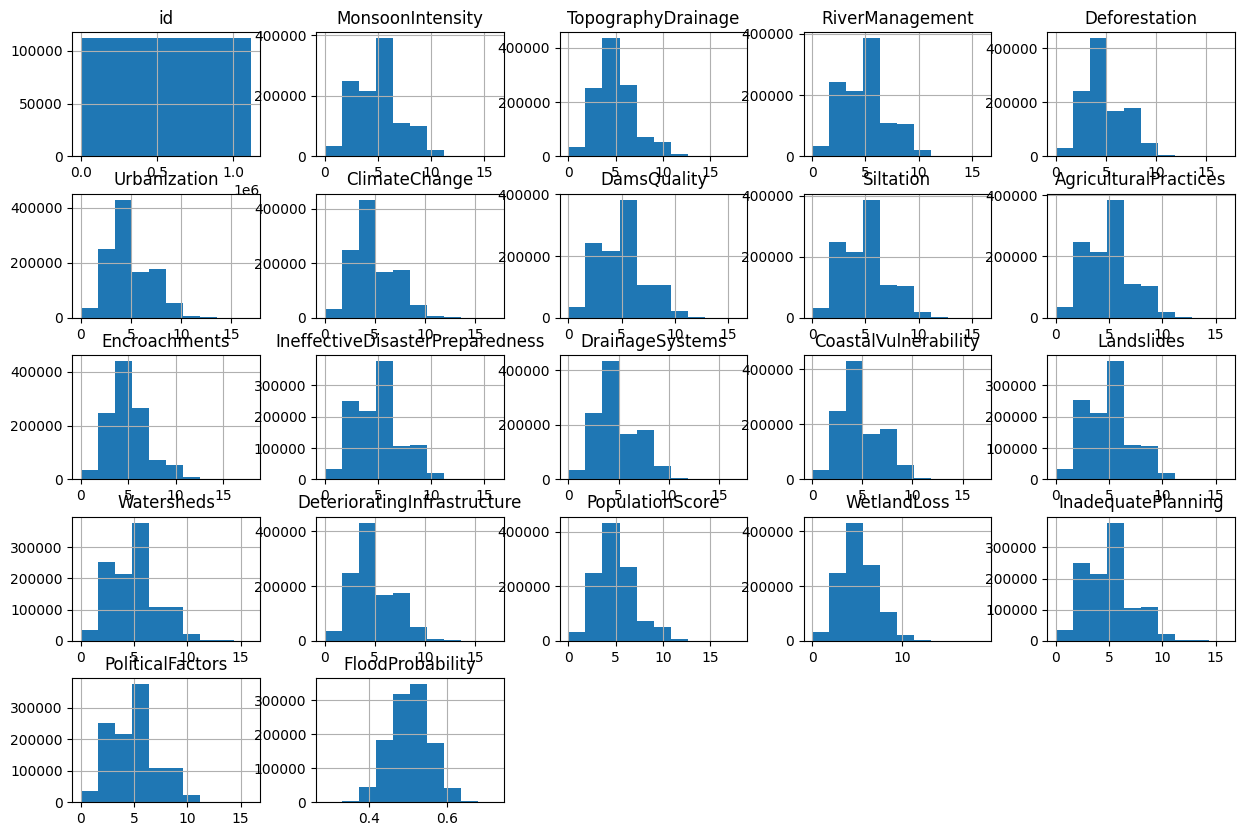

In [10]:
# prompt: train_df datseti grafik çiz

import matplotlib.pyplot as plt
# Histogram çizimi
train_df.hist(figsize=(15, 10))
plt.show()




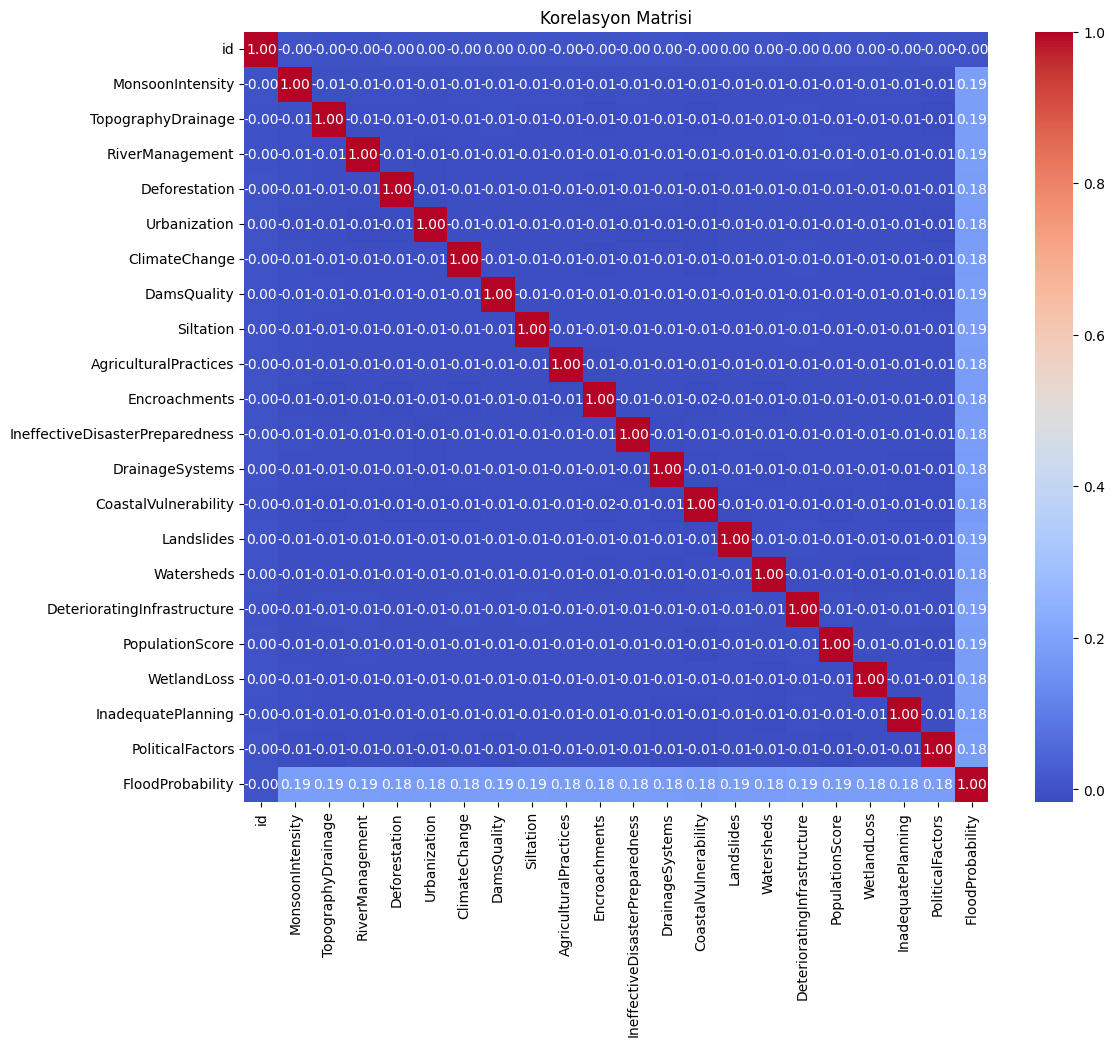

In [11]:
# Korelasyon matrisi çizimi
correlation_matrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()


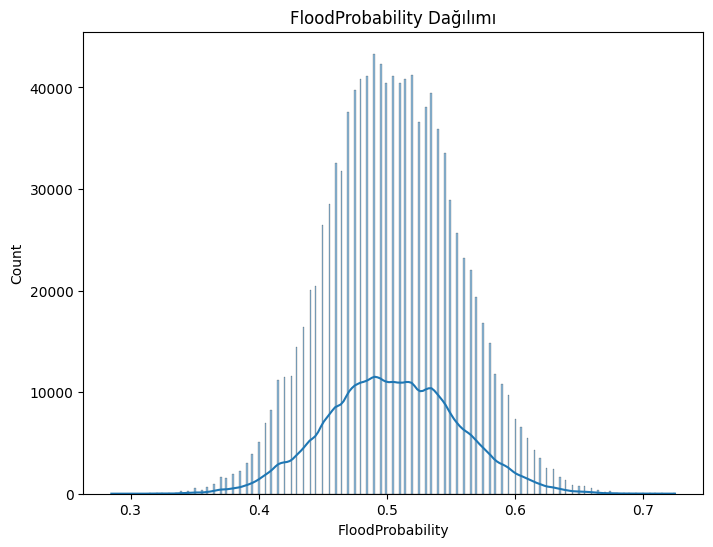

In [12]:

# FloodProbability dağılımı çizimi
plt.figure(figsize=(8, 6))
sns.histplot(train_df['FloodProbability'], kde=True)
plt.title('FloodProbability Dağılımı')
plt.show()



### **Modelleme**

In [13]:
# Veri setini eğitim ve test olarak ayırma
X = train_df.drop('FloodProbability', axis=1)
y = train_df['FloodProbability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [14]:
# prompt:   Lineer Regresyon modeli kullandık şimdi farklı model kullan başka model

import numpy as np
# Random Forest Regressor modeli oluşturma
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Modeli eğitim verileriyle eğitme
rf_model.fit(X_train, y_train)

# Test verileriyle tahmin yapma
y_pred_rf = rf_model.predict(X_test)

# Model performansını değerlendirme
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)


Decision Tree RMSE: 0.04997289306897356


In [15]:
# Lineer Regresyon modeli oluşturma
model = LinearRegression()

# Modeli eğitim verileriyle eğitme
model.fit(X_train, y_train)

# Test verileriyle tahmin yapma
y_pred = model.predict(X_test)

# Modelin performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
print(f"Ortalama Kare Hata (MSE): {mse}")



Ortalama Kare Hata (MSE): 0.0004032065305121672


In [16]:
# prompt: mse bittikten sonra test.csv test etmek var ve çıkan dosya csv olara kayıt etmek

import pandas as pd
test_df = pd.read_csv('test.csv')
test_df.head()

# Test verileriyle tahmin yapma
y_pred_test = model.predict(test_df)

# Tahminleri bir DataFrame'e dönüştürme
submission_df = pd.DataFrame({'FloodProbability': y_pred_test})

# Tahminleri CSV dosyasına kaydetme
submission_df.to_csv('submission67.csv', index=False)


In [17]:
# prompt: submission67 içinde id yok ekle

import pandas as pd
submission_df = pd.read_csv('submission67.csv')
test_df = pd.read_csv('test.csv')
submission_df['id'] = test_df['id']
submission_df = submission_df[['id', 'FloodProbability']]
submission_df.to_csv('submission607.csv', index=False)


In [ ]:
# prompt: sonuç 0.5878 çıkıyor sadece 0.5 falan çıksın

import pandas as pd
# Random Forest Regressor modeli oluşturma
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Modeli eğitim verileriyle eğitme
model.fit(X_train, y_train)

# Test verileriyle tahmin yapma
y_pred = model.predict(X_test)

# Modelin performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
print(f"Ortalama Kare Hata (MSE): {mse}")



test_df = pd.read_csv('test.csv')
test_df.head()

# Test verileriyle tahmin yapma
y_pred_test = model.predict(test_df)

# Tahminleri bir DataFrame'e dönüştürme
submission_df = pd.DataFrame({'FloodProbability': y_pred_test})

# Tahminleri CSV dosyasına kaydetme
submission_df.to_csv('submission67.csv', index=False)


submission_df = pd.read_csv('submission67.csv')
test_df = pd.read_csv('test.csv')
submission_df['id'] = test_df['id']
submission_df = submission_df[['id', 'FloodProbability']]
submission_df.to_csv('submission607.csv', index=False)
